# Tutorial 5: Lagged regressors

Lagged regressors are used to correlate other observed variables to our target time series. For example the temperature of the previous day might be a good predictor of the temperature of the next day.

They are often referred to as covariates. Unlike future regressors, the future of lagged regressors is unknown to us.

At the time $t$ of forecasting, we only have access to their observed, past values up to and including $t − 1$.

$$\text{Lagged regressor}(t) = L(t) = \sum_{x \in X}L_x(x_{t-1},x_{t-2},...,x_{t-p})$$

First we load a new dataset which also contains the temperature of the previous day.

In [1]:
import pandas as pd

# Load the dataset for tutorial 4 with the extra temperature column
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial04.csv")
df.head()

,ds,y,temperature
0,2015-01-01,64.92,277.00
1,2015-01-02,58.46,277.95
2,2015-01-03,63.35,278.83
3,2015-01-04,50.54,279.64
4,2015-01-05,64.89,279.05


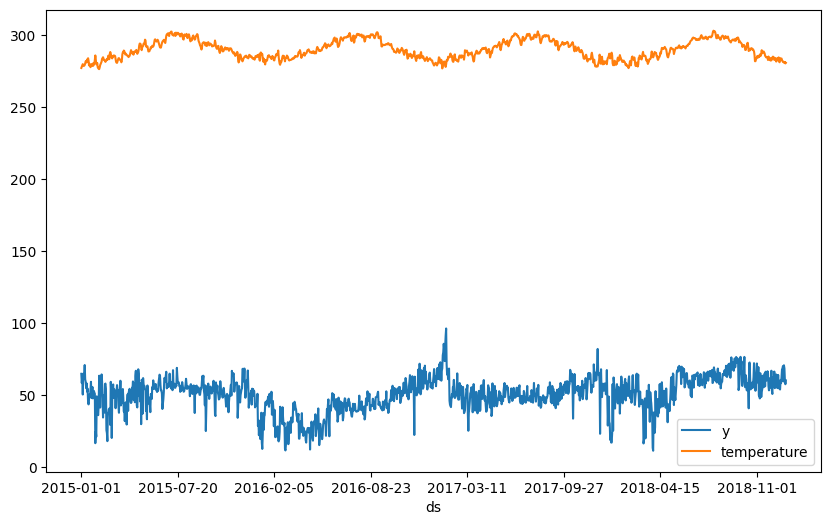

In [2]:
fig = df.plot(x="ds", y=["y", "temperature"], figsize=(10, 6))

After viewing the additional data we will add it as lagged regressor to our model. We start with our model from the previous tutorial. And then add the lagged regressor for the temperature to get a better energy price prediction.

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

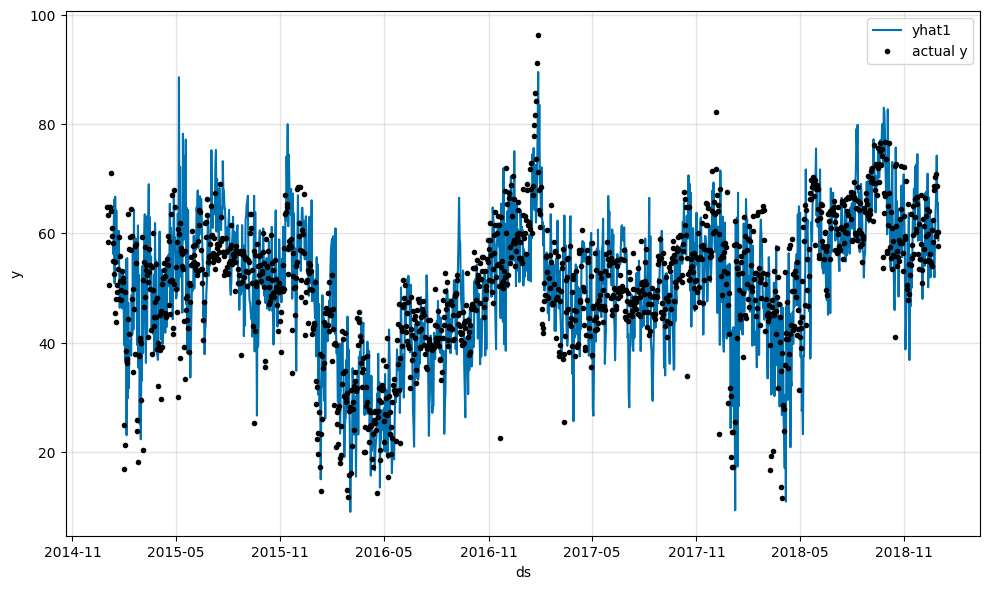

In [3]:
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Model and prediction
m = NeuralProphet(
    # Disable trend changepoints
    n_changepoints=10,
    # Disable seasonality components
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    # Add the autogression
    n_lags=10,
)
m.set_plotting_backend("matplotlib") # Use matplotlib due to #1235

# Add the new lagged regressor
m.add_lagged_regressor("temperature")

# Continue training the model and making a prediction
metrics = m.fit(df)
forecast = m.predict(df)
fig = m.plot(forecast)

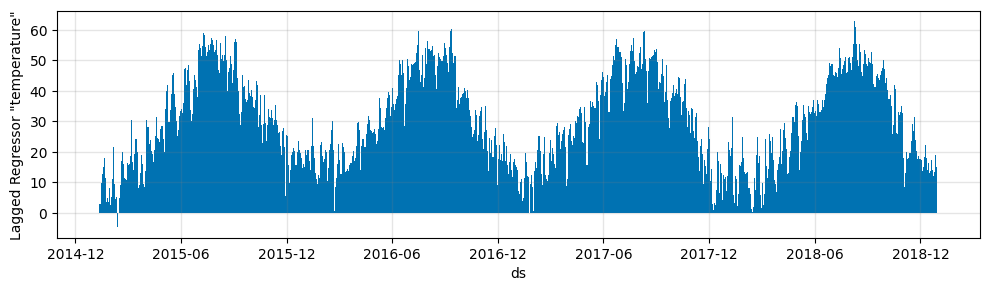

In [4]:
fig = m.plot_components(forecast, components=["lagged_regressors"])

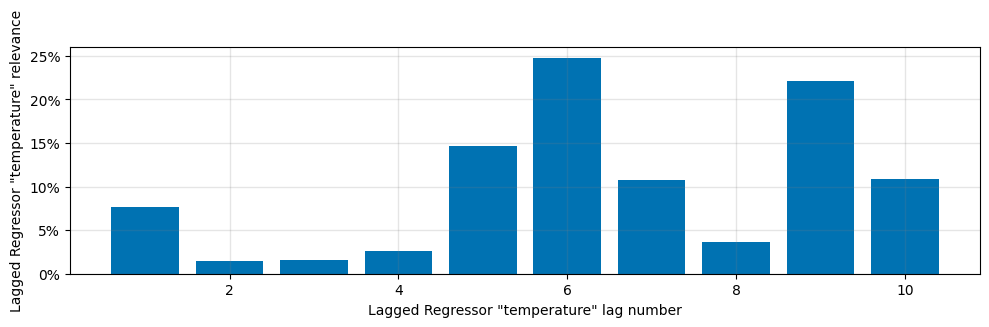

In [5]:
fig = m.plot_parameters(components=["lagged_regressors"])

Let us explore how our model improved after adding the lagged regressor.

In [6]:
metrics

,MAE,RMSE,Loss,RegLoss,epoch
0,148.857758,164.302490,1.699356,0.0,0
1,116.141441,133.159958,1.265512,0.0,1
2,57.385914,73.536575,0.505502,0.0,2
3,34.158726,44.292347,0.221687,0.0,3
4,17.354254,21.873476,0.060672,0.0,4
5,11.581091,14.668221,0.024808,0.0,5
6,10.566986,13.396470,0.020980,0.0,6
7,9.933492,12.693556,0.018805,0.0,7
8,9.487478,12.182710,0.017530,0.0,8
9,9.115108,11.741404,0.016327,0.0,9


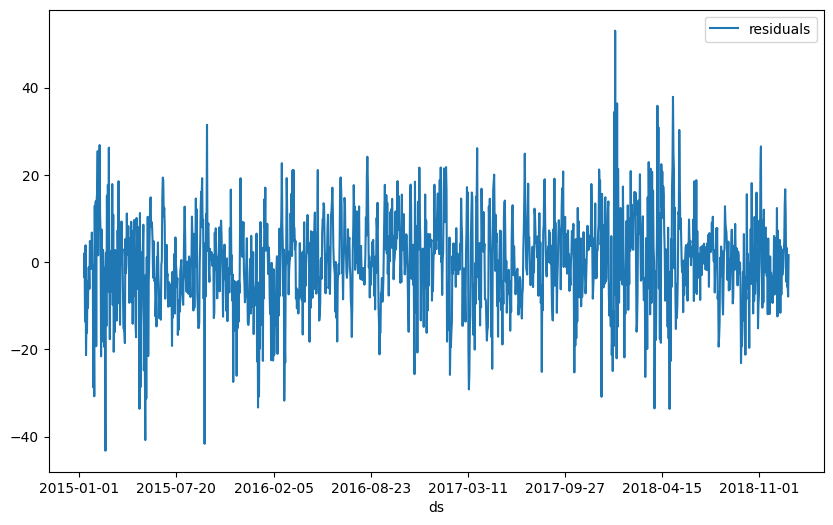

In [7]:
df_residuals = pd.DataFrame({
    "ds": df["ds"],
    "residuals": df["y"] - forecast["yhat1"]
})
fig = df_residuals.plot(x="ds", y="residuals", figsize=(10, 6))